# Visualizing ZDF files

This notebook can be used to quickly visualize ZDF files.

## 2D grid data

* `plot2d( filename )` function that can be used to open a `.zdf` file and produce a 2D (colormap) plot

In [3]:
import zdf

import matplotlib.pyplot as plt
import matplotlib.colors as colors

def plot2d( filename, xlim = None, ylim = None, grid = False, cmap = None ):
    (data, info) = zdf.read(filename)

    if ( info.type != "grid" ):
        print("(*error*) file {} is not a grid file".format(filename))
        return
    
    if ( info.grid.ndims != 2 ):
        print("(*error*) file {} is not a 2D grid file".format(filename))
        return

    range = [
        [info.grid.axis[0].min, info.grid.axis[0].max],
        [info.grid.axis[1].min, info.grid.axis[1].max]
    ]

    plt.imshow( data, interpolation = 'nearest', origin = 'lower',
            extent = ( range[0][0], range[0][1], range[1][0], range[1][1] ),
            aspect = 'auto', cmap=cmap )

    zlabel = "{}\,[{:s}]".format( info.grid.label, info.grid.units )

    plt.colorbar().set_label(r'$\sf{' + zlabel + r'}$')

    xlabel = "{}\,[{:s}]".format( info.grid.axis[0].label, info.grid.axis[0].units )
    ylabel = "{}\,[{:s}]".format( info.grid.axis[1].label, info.grid.axis[1].units )

    plt.xlabel(r'$\sf{' + xlabel + r'}$')
    plt.ylabel(r'$\sf{' + ylabel + r'}$')

    plt.title("$\sf {} $\nt = ${:g}$ [$\sf {}$]".format(
        info.grid.label.replace(" ","\;"),
        info.iteration.t,
        info.iteration.tunits))

    if ( xlim ):
        plt.xlim(xlim)
    if ( ylim ):
        plt.ylim(ylim)

    plt.grid(grid)


    plt.show()


## Example

Visualize file `test-000000.zdf`:

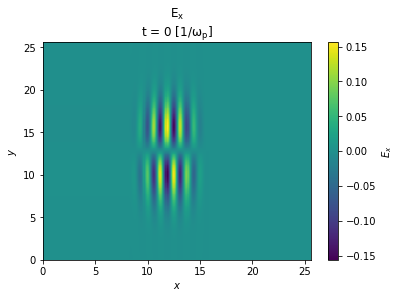

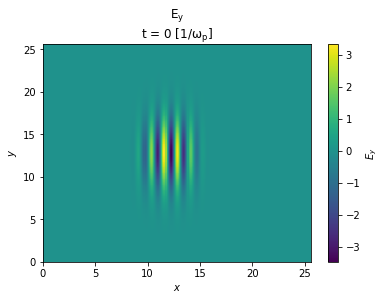

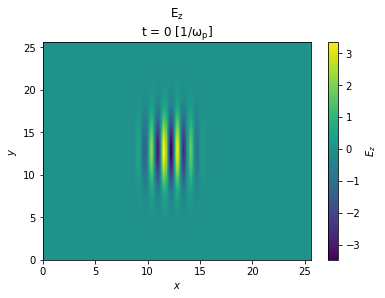

In [79]:

plot2d( "EMF/Ex-000000.zdf" )
plot2d( "EMF/Ey-000000.zdf" )
plot2d( "EMF/Ez-000000.zdf" )

Plotting B field components for iteration 57.


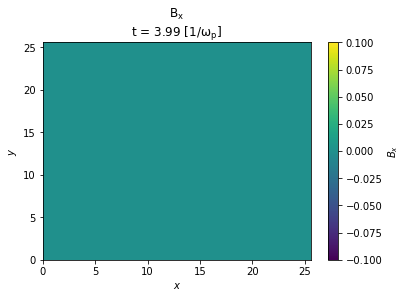

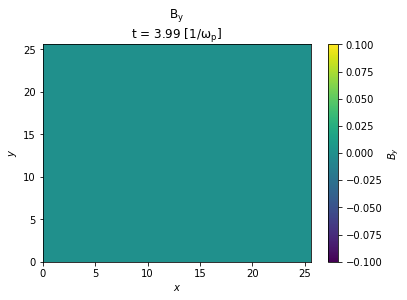

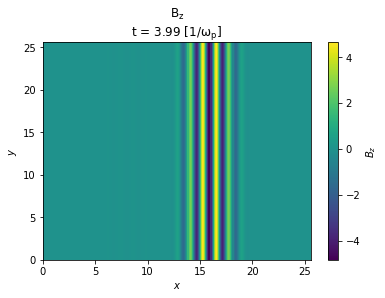

In [88]:
def plot_vfld( fld, iter ):
    print("Plotting {} field components for iteration {}.".format(fld,iter))
    
    file = "./EMF/{}x-{:06d}.zdf".format(fld,iter)
    plot2d(file)
    file = "./EMF/{}y-{:06d}.zdf".format(fld,iter)
    plot2d(file)
    file = "./EMF/{}z-{:06d}.zdf".format(fld,iter)
    plot2d(file)


plot_vfld('B',57)

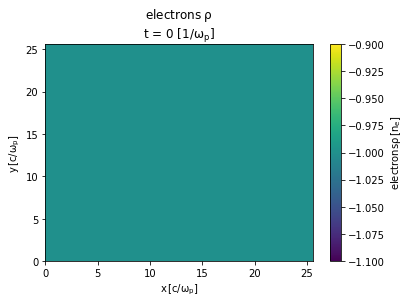

In [73]:
plot2d("CHARGE/electrons/electrons-charge-000000.zdf")

## Particle data

In [4]:
import zdf

import matplotlib.pyplot as plt
import matplotlib.colors as colors

def part2D( filename, q1, q2, xlim = None, ylim = None, grid = True, 
    marker = '.', ms = 1, alpha = 1 ):
    (particles, info) = zdf.read(filename)

    if ( info.type != "particles" ):
        print("(*error*) file {} is not a particles file".format(filename))
        return
    
    if ( not q1 in info.particles.quants ):
        print("(*error*) '{}' quantity (q1) is not present in file".format(q1) )
        return

    if ( not q2 in info.particles.quants ):
        print("(*error*) '{}' quantity (q2) is not present in file".format(q2) )
        return

    x = particles[q1]
    y = particles[q2]

    plt.plot(x, y, marker, ms=ms, alpha = alpha)

    title = "{}/{}".format( info.particles.qlabels[q2], info.particles.qlabels[q1])
    timeLabel = "t = {:g}\,[{:s}]".format(info.iteration.t, info.iteration.tunits)

    plt.title(r'$\sf{' + title + r'}$' + '\n' + r'$\sf{' + timeLabel + r'}$')

    xlabel = "{}\,[{:s}]".format( info.particles.qlabels[q1], info.particles.qunits[q1] )
    ylabel = "{}\,[{:s}]".format( info.particles.qlabels[q2], info.particles.qunits[q2] )

    plt.xlabel(r'$\sf{' + xlabel + r'}$')
    plt.ylabel(r'$\sf{' + ylabel + r'}$')

    if ( xlim ):
        plt.xlim(xlim)
    if ( ylim ):
        plt.ylim(ylim)

    plt.grid(grid)

    plt.show()


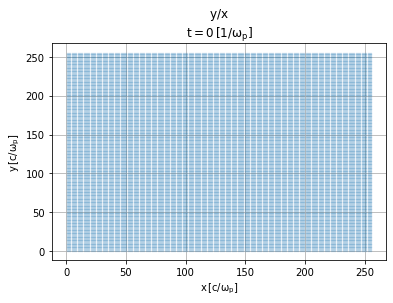

In [5]:
part2D( "PARTICLES/electrons/particles-electrons-000000.zdf", "x", "y", alpha = 0.2 )